In [1]:
#relevant imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
import glob

In [2]:
#aggregating collected data
paths = glob.glob('./BTC/BTC*.zip')

full_dataset = None

for i in range(len(paths)):
    if full_dataset is None:
        full_dataset = pd.read_csv('BTC/BTC_Book_' + str(i) + '.zip', 
                                   compression = 'zip', index_col = 0, parse_dates = True)
    else:
        app_data = pd.read_csv('BTC/BTC_Book_' + str(i) + '.zip', 
                               compression = 'zip', index_col = 0, parse_dates = True)
        full_dataset = full_dataset.append(app_data)
        
full_dataset.head(1)        

,Sequence,Bid_1_Price,Bid_1_Size,Bid_1_Trades,Bid_2_Price,Bid_2_Size,Bid_2_Trades,Bid_3_Price,Bid_3_Size,Bid_3_Trades,...,Ask_47_Trades,Ask_48_Price,Ask_48_Size,Ask_48_Trades,Ask_49_Price,Ask_49_Size,Ask_49_Trades,Ask_50_Price,Ask_50_Size,Ask_50_Trades
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-04-03 17:06:34.424123-04:00,13321475728,6708.69,0.44705,1,6705.57,0.433865,1,6705.56,3.8,1,...,1,6741.24,1.334,1,6743.0,0.058299,1,6743.06,0.927,1


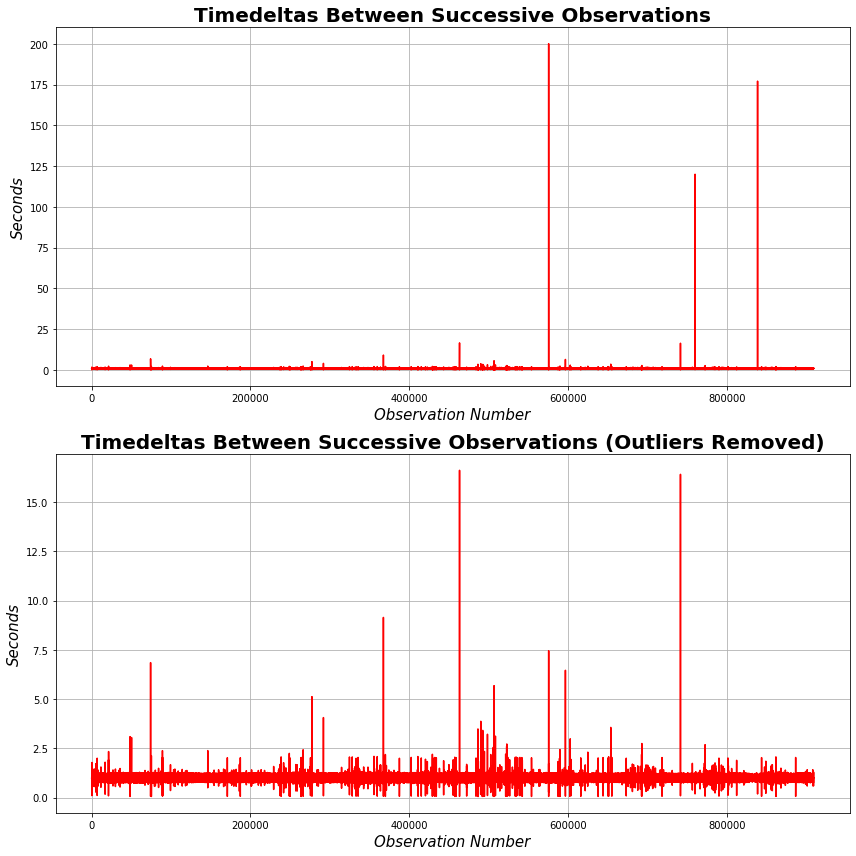

In [3]:
#get index
idx = np.int64(full_dataset.index.values)/1000000000
ts_diffs = np.diff(idx)

#plot timestamp differences
fig, ax= plt.subplots(2,1, figsize = (12,12))
fig.set_tight_layout(True)

ax[0].plot(ts_diffs, color = 'red')
ax[0].grid('on')
ax[0].set_title('Timedeltas Between Successive Observations', weight = 'bold', fontsize = 20)
ax[0].set_xlabel('Observation Number', fontstyle = 'italic', fontsize = 15)
ax[0].set_ylabel('Seconds', fontstyle = 'italic', fontsize = 15)

#remove outliers
outlier_removed = ts_diffs
for i in range(3):
    outlier_idx = np.argmax(outlier_removed)
    outlier_removed[outlier_idx] = 1

ax[1].plot(outlier_removed, color = 'red')
ax[1].grid('on')
ax[1].set_title('Timedeltas Between Successive Observations (Outliers Removed)', weight = 'bold', fontsize = 20)
ax[1].set_xlabel('Observation Number', fontstyle = 'italic', fontsize = 15)
ax[1].set_ylabel('Seconds', fontstyle = 'italic', fontsize = 15)

fig.savefig('./../figures/Timedelta_Quality.png')
#there is some noise in the data, but for the most part, observations are collected ~1 second apart

In [4]:
noise_thres = .3
noisy_count = len(ts_diffs[np.where(ts_diffs > (1+noise_thres))])
noisy_count += len(ts_diffs[np.where(ts_diffs < (1-noise_thres))])

noisy_rate = noisy_count/len(ts_diffs)
print("%f percent of samples have a large timedelta" % (noisy_rate*100))

0.151314 percent of samples have a large timedelta


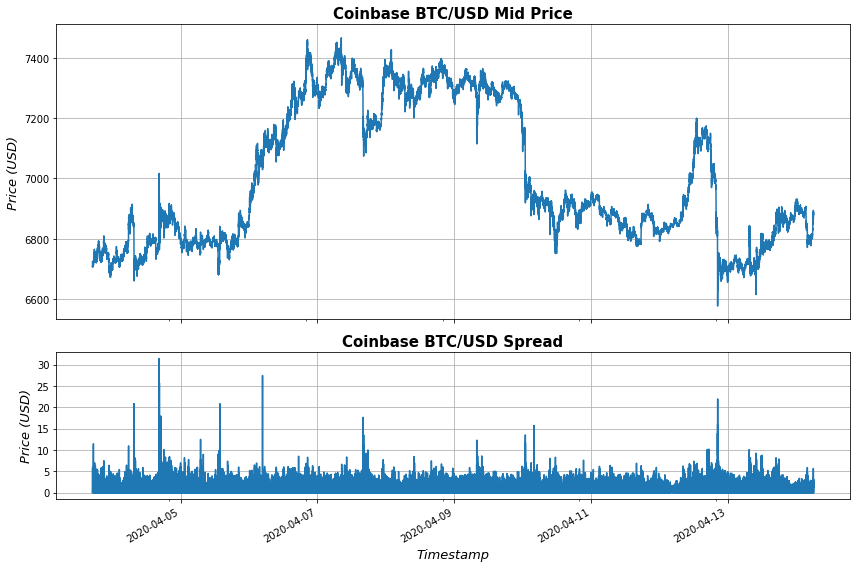

In [5]:
#plotting series thus far
mid_price = (full_dataset['Ask_1_Price'] + full_dataset['Bid_1_Price'])/2
spread = full_dataset['Ask_1_Price'] - full_dataset['Bid_1_Price']

fig, axs = plt.subplots(2,1, figsize = (12,8), sharex = True, gridspec_kw={'height_ratios': [2, 1]})
fig.set_tight_layout(True)

mid_price.plot(ax = axs[0])
axs[0].set_title('Coinbase BTC/USD Mid Price', weight = 'bold', fontsize = 15)
axs[0].set_xlabel('Timestamp', fontstyle = 'italic', fontsize = 13)
axs[0].set_ylabel('Price (USD)', fontstyle = 'italic', fontsize = 13)
axs[0].grid('on')


spread.plot(ax = axs[1])
axs[1].set_title('Coinbase BTC/USD Spread', weight = 'bold', fontsize = 15)
axs[1].set_xlabel('Timestamp', fontstyle = 'italic', fontsize = 13)
axs[1].set_ylabel('Price (USD)', fontstyle = 'italic', fontsize = 13)
axs[1].grid('on')

fig.savefig('./../figures/Dataset_Price_and_Spread.png')